In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("E:/Projects/NN_Project/mnist_test.csv")
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
len(data)

10000

In [6]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
#_,m_train = X_train.shape

In [7]:
Y_train

array([4, 1, 0, ..., 1, 6, 1], dtype=int64)

In [8]:
X_train[ : , 0].shape

(784,)

In [9]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5 
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5  
    return W1, b1, W2, b2

In [10]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [11]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [12]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [13]:
def ReLU_deriv(Z):
    return Z > 0

In [14]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [15]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [16]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [18]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [19]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [20]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [24]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 2000)

Iteration:  0
[4 4 6 ... 4 6 3] [4 1 0 ... 1 6 1]
0.08255555555555555
Iteration:  10
[4 0 6 ... 2 5 8] [4 1 0 ... 1 6 1]
0.1438888888888889
Iteration:  20
[4 0 6 ... 1 6 1] [4 1 0 ... 1 6 1]
0.24255555555555555
Iteration:  30
[4 1 6 ... 1 6 1] [4 1 0 ... 1 6 1]
0.32811111111111113
Iteration:  40
[4 1 6 ... 1 6 1] [4 1 0 ... 1 6 1]
0.40066666666666667
Iteration:  50
[4 1 6 ... 1 6 1] [4 1 0 ... 1 6 1]
0.4552222222222222
Iteration:  60
[4 1 6 ... 1 6 1] [4 1 0 ... 1 6 1]
0.49855555555555553
Iteration:  70
[4 1 6 ... 1 6 1] [4 1 0 ... 1 6 1]
0.5341111111111111
Iteration:  80
[4 1 6 ... 1 6 1] [4 1 0 ... 1 6 1]
0.5695555555555556
Iteration:  90
[4 1 6 ... 1 6 1] [4 1 0 ... 1 6 1]
0.5957777777777777
Iteration:  100
[4 1 6 ... 1 6 1] [4 1 0 ... 1 6 1]
0.6201111111111111
Iteration:  110
[4 1 6 ... 1 6 1] [4 1 0 ... 1 6 1]
0.6404444444444445
Iteration:  120
[4 1 6 ... 1 6 1] [4 1 0 ... 1 6 1]
0.6586666666666666
Iteration:  130
[4 1 6 ... 1 6 1] [4 1 0 ... 1 6 1]
0.6755555555555556
Iteration:  

In [42]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


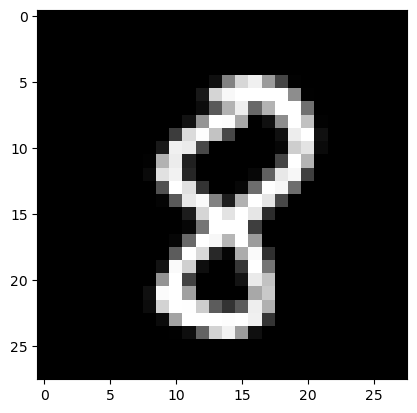

Prediction:  [2]
Label:  2


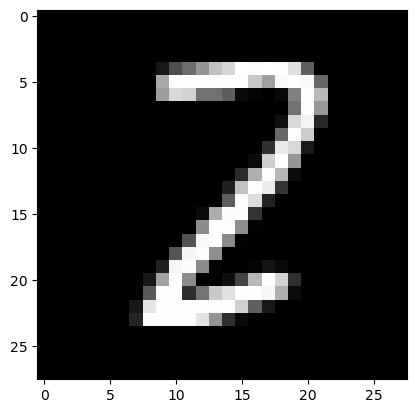

Prediction:  [5]
Label:  5


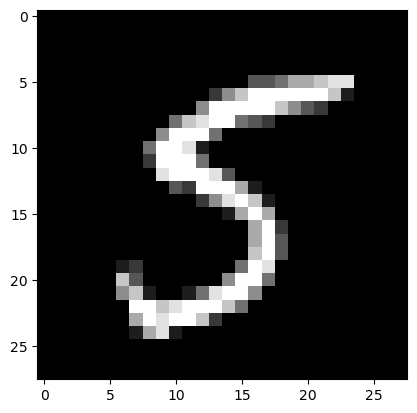

Prediction:  [6]
Label:  6


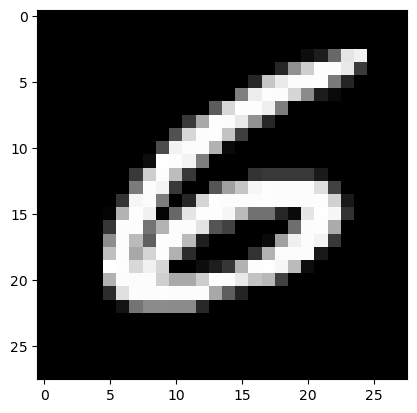

In [43]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(11, W1, b1, W2, b2)

In [44]:
W1

array([[ 0.01592862,  0.3616311 ,  0.00324866, ...,  0.46152177,
        -0.02363015,  0.05735476],
       [-0.0305677 , -0.21369358, -0.12148954, ...,  0.29059114,
        -0.09642017, -0.32316243],
       [-0.23824586, -0.20068151, -0.49207836, ...,  0.34405595,
         0.20477168,  0.31177056],
       ...,
       [ 0.02566498, -0.09227728, -0.32481781, ...,  0.00909104,
        -0.20559183, -0.01346859],
       [ 0.05450377,  0.2203632 ,  0.15018716, ..., -0.42371333,
         0.14786342,  0.49941487],
       [-0.10035719, -0.4018813 , -0.03520356, ...,  0.06164187,
        -0.42725688, -0.08923789]])